# **Group assignment - The Olympics**

###### <b>Fanny Degerman, Delal Uca, Adrian Söderberg Skog och Patrik Hellgren<br>AIM25G<br>2025-11-26</b>

---

### **Part 0 - Exploratory Data Analysis (EDA)**

### <span style="color:green">**UPPGIFT A-E KAN VI KÖRA PÅ KODEN NEDAN OM DET ÄR OK FÖR ALLA.**</span>
### <span style="color:red">**UPPGIFT F BEHÖVER VI ANPASSA EFTER VÅRA VALDA DIAGRAM.**</span>
### <span style="color:green">**UPPGIFT G-H KAN VI OCKSÅ KÖRA PÅ SÅSOM DE ÄR OM DET ÄR OK FÖR ALLA.**</span>
### <span style="color:red">**UPPGIFT I BEHÖVER VI OCKSÅ ANPASSA EFTER VÅRA VALDA DIAGRAM.**</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from pathlib import Path
pd.set_option("display.max_colwidth", 20)

path = Path.cwd()/"dashboard"/"data"/"athlete_events.csv"

df = pd.read_csv(path)
display(df.head())
print(df.info())

ModuleNotFoundError: No module named 'plotly_express'

In [ ]:
# A
print(f"A total of {df["NOC"].nunique()} countries are represented in the dataset.")

A total of 230 countries are represented in the dataset.


In [ ]:
# B
print(f"The following countries are represented:\n{', '.join(sorted(df["NOC"].unique()))}")

The following countries are represented:
AFG, AHO, ALB, ALG, AND, ANG, ANT, ANZ, ARG, ARM, ARU, ASA, AUS, AUT, AZE, BAH, BAN, BAR, BDI, BEL, BEN, BER, BHU, BIH, BIZ, BLR, BOH, BOL, BOT, BRA, BRN, BRU, BUL, BUR, CAF, CAM, CAN, CAY, CGO, CHA, CHI, CHN, CIV, CMR, COD, COK, COL, COM, CPV, CRC, CRO, CRT, CUB, CYP, CZE, DEN, DJI, DMA, DOM, ECU, EGY, ERI, ESA, ESP, EST, ETH, EUN, FIJ, FIN, FRA, FRG, FSM, GAB, GAM, GBR, GBS, GDR, GEO, GEQ, GER, GHA, GRE, GRN, GUA, GUI, GUM, GUY, HAI, HKG, HON, HUN, INA, IND, IOA, IRI, IRL, IRQ, ISL, ISR, ISV, ITA, IVB, JAM, JOR, JPN, KAZ, KEN, KGZ, KIR, KOR, KOS, KSA, KUW, LAO, LAT, LBA, LBR, LCA, LES, LIB, LIE, LTU, LUX, MAD, MAL, MAR, MAS, MAW, MDA, MDV, MEX, MGL, MHL, MKD, MLI, MLT, MNE, MON, MOZ, MRI, MTN, MYA, NAM, NBO, NCA, NED, NEP, NFL, NGR, NIG, NOR, NRU, NZL, OMA, PAK, PAN, PAR, PER, PHI, PLE, PLW, PNG, POL, POR, PRK, PUR, QAT, RHO, ROT, ROU, RSA, RUS, RWA, SAA, SAM, SCG, SEN, SEY, SGP, SKN, SLE, SLO, SMR, SOL, SOM, SRB, SRI, SSD, STP, SUD, SUI, SUR,

In [ ]:
# C
print(f"The following sports are represented:\n{', '.join(sorted(df["Sport"].unique()))}")

The following sports are represented:
Aeronautics, Alpine Skiing, Alpinism, Archery, Art Competitions, Athletics, Badminton, Baseball, Basketball, Basque Pelota, Beach Volleyball, Biathlon, Bobsleigh, Boxing, Canoeing, Cricket, Croquet, Cross Country Skiing, Curling, Cycling, Diving, Equestrianism, Fencing, Figure Skating, Football, Freestyle Skiing, Golf, Gymnastics, Handball, Hockey, Ice Hockey, Jeu De Paume, Judo, Lacrosse, Luge, Military Ski Patrol, Modern Pentathlon, Motorboating, Nordic Combined, Polo, Racquets, Rhythmic Gymnastics, Roque, Rowing, Rugby, Rugby Sevens, Sailing, Shooting, Short Track Speed Skating, Skeleton, Ski Jumping, Snowboarding, Softball, Speed Skating, Swimming, Synchronized Swimming, Table Tennis, Taekwondo, Tennis, Trampolining, Triathlon, Tug-Of-War, Volleyball, Water Polo, Weightlifting, Wrestling


In [ ]:
# D
print(f"It's possible to win {', '.join(df["Medal"].dropna().unique())} medals.")

It's possible to win Gold, Bronze, Silver medals.


In [ ]:
# E
df["Age"].describe().loc[["mean", "50%", "min", "max", "std"]]

mean    25.556898
50%     24.000000
min     10.000000
max     97.000000
std      6.393561
Name: Age, dtype: float64

In [ ]:
# F
## How many different athletes are represented in the dataset?
print(f"There are {df["ID"].dropna().nunique():,}".replace(","," ") + " different athletes in the dataset.\n")

## How many unique men/women are represented in the dataset?
print(f"{df.groupby("Sex")["ID"].nunique()}\n")

## In what year did Hungary win the most gold medals?
hun_unique_sports = df.loc[(df["Medal"] == "Gold") & (df["NOC"] == "HUN"), ["Year", "Event"]].drop_duplicates()
hun_count = hun_unique_sports["Year"].value_counts()
print(f"In {hun_count.idxmax()} Hungary took {hun_count.max()} gold medals.")

## EN TILL HÄR? (ENDAST DATA, EJ PLOT! SE UPPGIFT I.)

## EN TILL HÄR? (ENDAST DATA, EJ PLOT! SE UPPGIFT I.)

## EN TILL HÄR? (ENDAST DATA, EJ PLOT! SE UPPGIFT I.)

There are 135 571 different athletes in the dataset.

Sex
F     33981
M    101590
Name: ID, dtype: int64

In 1952 Hungary took 16 gold medals.


<Axes: xlabel='Sex', ylabel='count'>

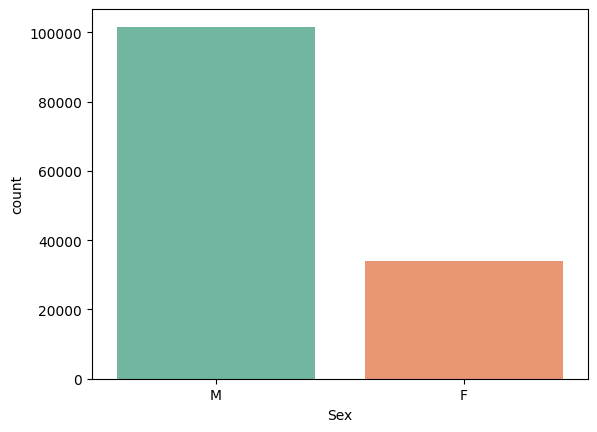

In [ ]:
# G
unique_participants = df.drop_duplicates(subset=["ID"])
sns.countplot(unique_participants, x="Sex", hue="Sex", palette="Set2")

In [ ]:
# H
medals = df[["NOC", "Year", "Event", "Medal"]].dropna().drop_duplicates(subset=["NOC", "Year", "Event", "Medal"])
medals_per_NOC = medals.groupby("NOC")["Medal"].count().sort_values(ascending=False)
top10_NOC = medals_per_NOC[:10].reset_index()

fig = px.bar(data_frame=top10_NOC,
       x="NOC", 
       y="Medal", 
       labels={"NOC": "Countries", "Medal": "Number of medals"}, 
       title="Top 10 countries with most medals won",
       color="NOC")
fig.show()

In [ ]:
# I: "plotta gärna fler saker som är intressant"

## EN PLOT TILL HÄR

## EN PLOT TILL HÄR

## EN PLOT TILL HÄR


In [3]:
import plotly.express as px
import plotly.io as pio 
pio.renderers.default = "browser"

gymnastics_1952 = df[(df["Sport"] == "Gymnastics") & (df["Year"] == 1952)]

fig = px.pie(
    gymnastics_1952,
    names="Sex",
    title="Könsfördelning i Gymnastics – alla länder (1952)"
)

fig.show()

NameError: name 'df' is not defined